In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [4]:
log_path = Path("/home/neni/repos/thesis/logs_all")
MACHINE = "RebelRig"
BATCH_SIZE = 128
DATASET = "imagenet_10pct"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    pids = [
        8716, 8989, # Naive
        9453, 9728, # MPS
        10286, 10641, # Shared
        11105, 11481, # Shared + MPS
        11882, 12121, # Naive + DALI
        12466, 12691, # Shared + DALI
        15381, 15662, # Naive + DALI + MPS
        16168, 16439, # Shared + DALI + MPS
        17909, 18361, # Shared + memcpy in workers
        19614, 20058, # Shared + loader per worker + memcpy in workers
        20993, 22565, # Shared + loader per worker
        25104, 25351, # Naive, Dummy data
    ]

    trace_pids = [
        8716, 8989, # Naive
        9453, 9728, # MPS
        10244, 10598, # Shared
        11062, 11437, # Shared + MPS
        11882, 12121, # Naive + DALI
        12428, 12652, # Shared + DALI
        15381, 15662, # Naive + DALI + MPS
        16135, 16403, # Shared + DALI + MPS
        17857, 18310, # Shared + memcpy in workers
        19614, 19986, # Shared + loader per worker + memcpy in workers
        20949, 22487, # Shared + loader per worker
        25104, 25351, # Naive, Dummy data
    ]
if DATASET == "imagenet_10pct":
    pids = [
        14250, 14679, # Naive
        15304, 15745, # MPS
        16496, 16916, # Shared
        17598, 18018, # Shared + MPS
        18539, 0, # Naive DALI
        18821, 19052, # Shared DALI
    ]

    trace_pids = [
        14250, 14679, # Naive
        15304, 15745, # MPS
        16453, 16873, # Shared
        17555, 17975, # Shared + MPS
        18539, 0, # Naive DALI
        18787, 19019, # Shared DALI
    ]

In [14]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}.csv")

# BASELINE + MPS

df_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
df_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}.csv")

# SHARED DATA

df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[4]}.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[5]}.csv")

# SHARED DATA + MPS

df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[6]}.csv")
df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[7]}.csv")

# BASELINE + DALI

df_dali_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}.csv")
#df_dali_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}.csv")

# SHARED + DALI

df_mul_dali_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[10]}.csv")
df_mul_dali_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[11]}.csv")

# BASELINE + DALI + MPS

#df_dali_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[12]}.csv")
#df_dali_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[13]}.csv")

# SHARED + DALI + MPS

#df_mul_dali_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}.csv")
#df_mul_dali_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}.csv")

# SHARED + memcpy in workers

#df_mul_1x_memcpy_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[16]}.csv")
#df_mul_2x_memcpy_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[17]}.csv")

# SHARED + loader per worker, memcpy in workers

#df_mul_1x_memcpy_loader_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[18]}.csv")
#df_mul_2x_memcpy_loader_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[19]}.csv")

# SHARED + loader per worker

#df_mul_1x_loader_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[20]}.csv")
#df_mul_2x_loader_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[21]}.csv")

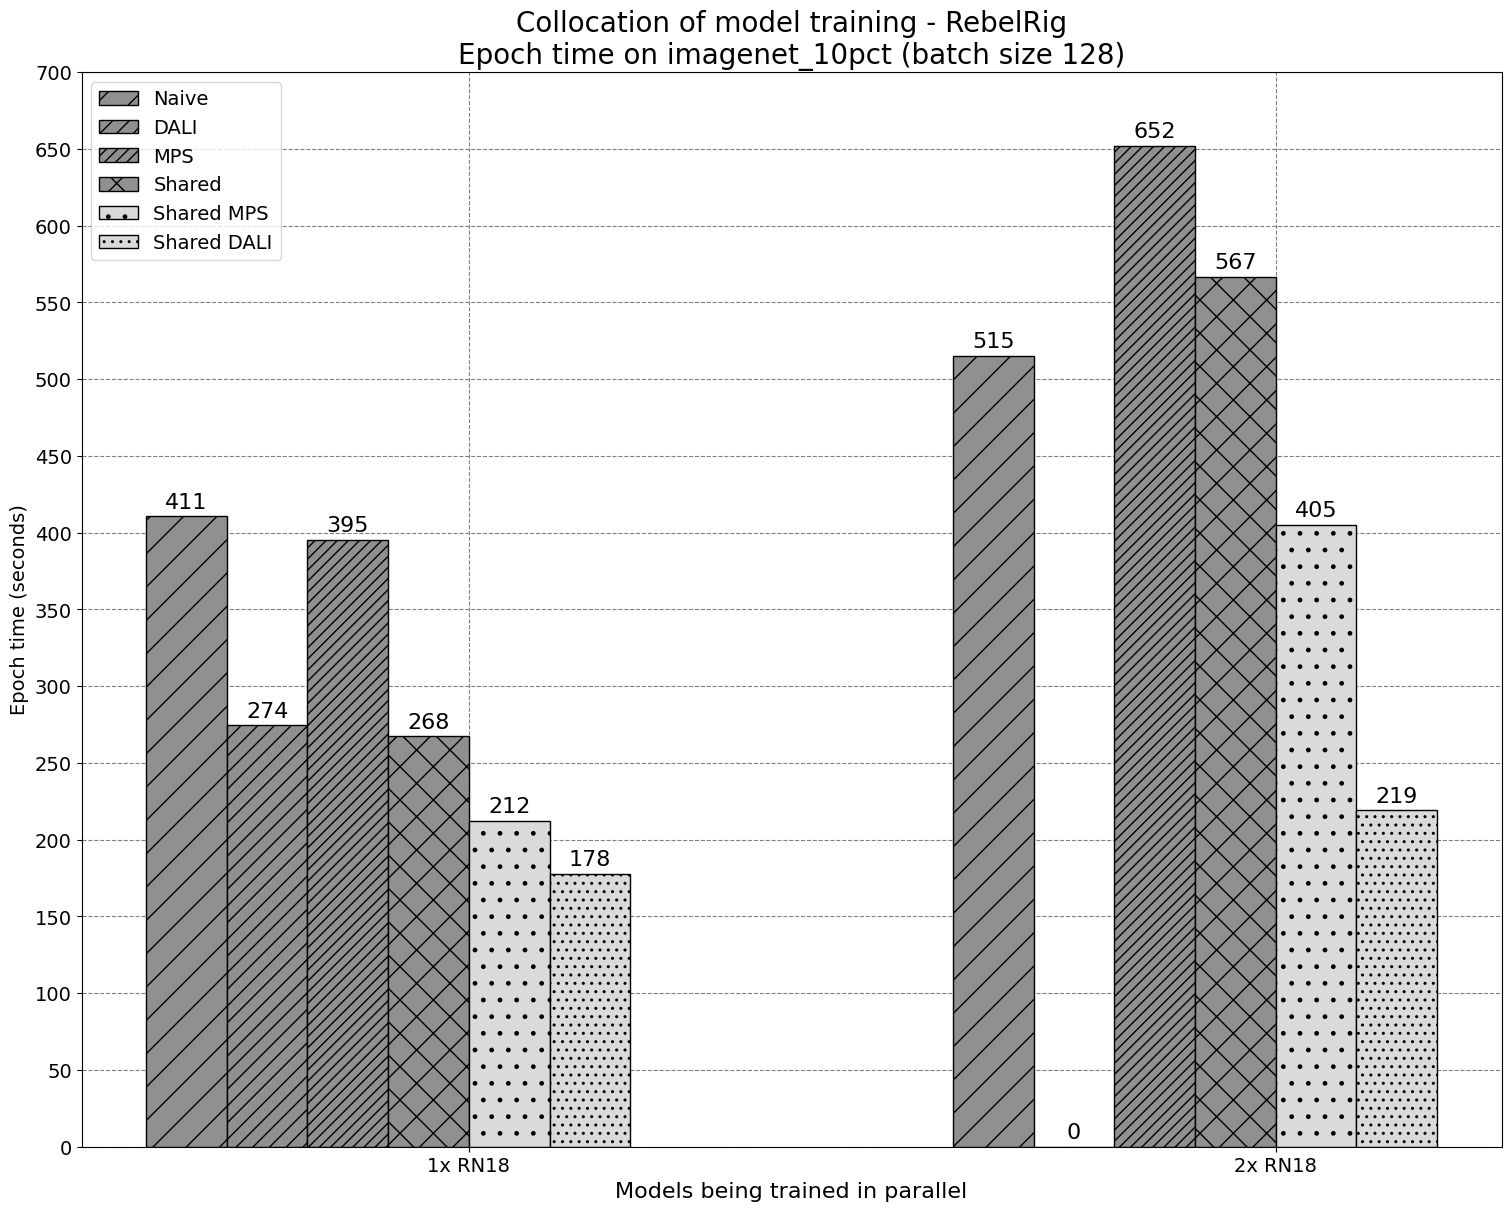

In [15]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18")

naive = [df.iloc[2:]["total_time"].mean() for df in [df_1x, df_2x]]

naive_dali = [df.iloc[2:]["total_time"].mean() for df in [df_dali_1x]] + [0]

mps = [df.iloc[2:]["total_time"].mean() for df in [df_1x_mps, df_2x_mps]]

#naive_dali_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_dali_1x_mps, df_dali_2x_mps]]

shared = [df.iloc[2:]["total_time"].mean() for df in [df_mul_1x, df_mul_2x]]

shared_dali = [df.iloc[2:]["total_time"].mean() for df in [df_mul_dali_1x, df_mul_dali_2x]]

shared_mps = [df.iloc[2:]["total_time"].mean() for df in [df_mul_1x_mps, df_mul_2x_mps]]

#shared_dali_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_dali_1x_mps, df_mul_dali_2x_mps]]

measurements ={
    "Naive": naive,
    "DALI": naive_dali,
    "MPS": mps,
    #"DALI MPS": naive_dali_mps,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
    #"Shared DALI MPS": shared_dali_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -2.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
#shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]
#shades = ["#000000", "#1f1e1e", "#4d4b4b", "#757272", "#9c9797", "#bfbaba"]
hatches = ["/", "//", "///", "x", ".", "..", "....", "x"]
hatch_cols = ["#919090", "#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 701, 50)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

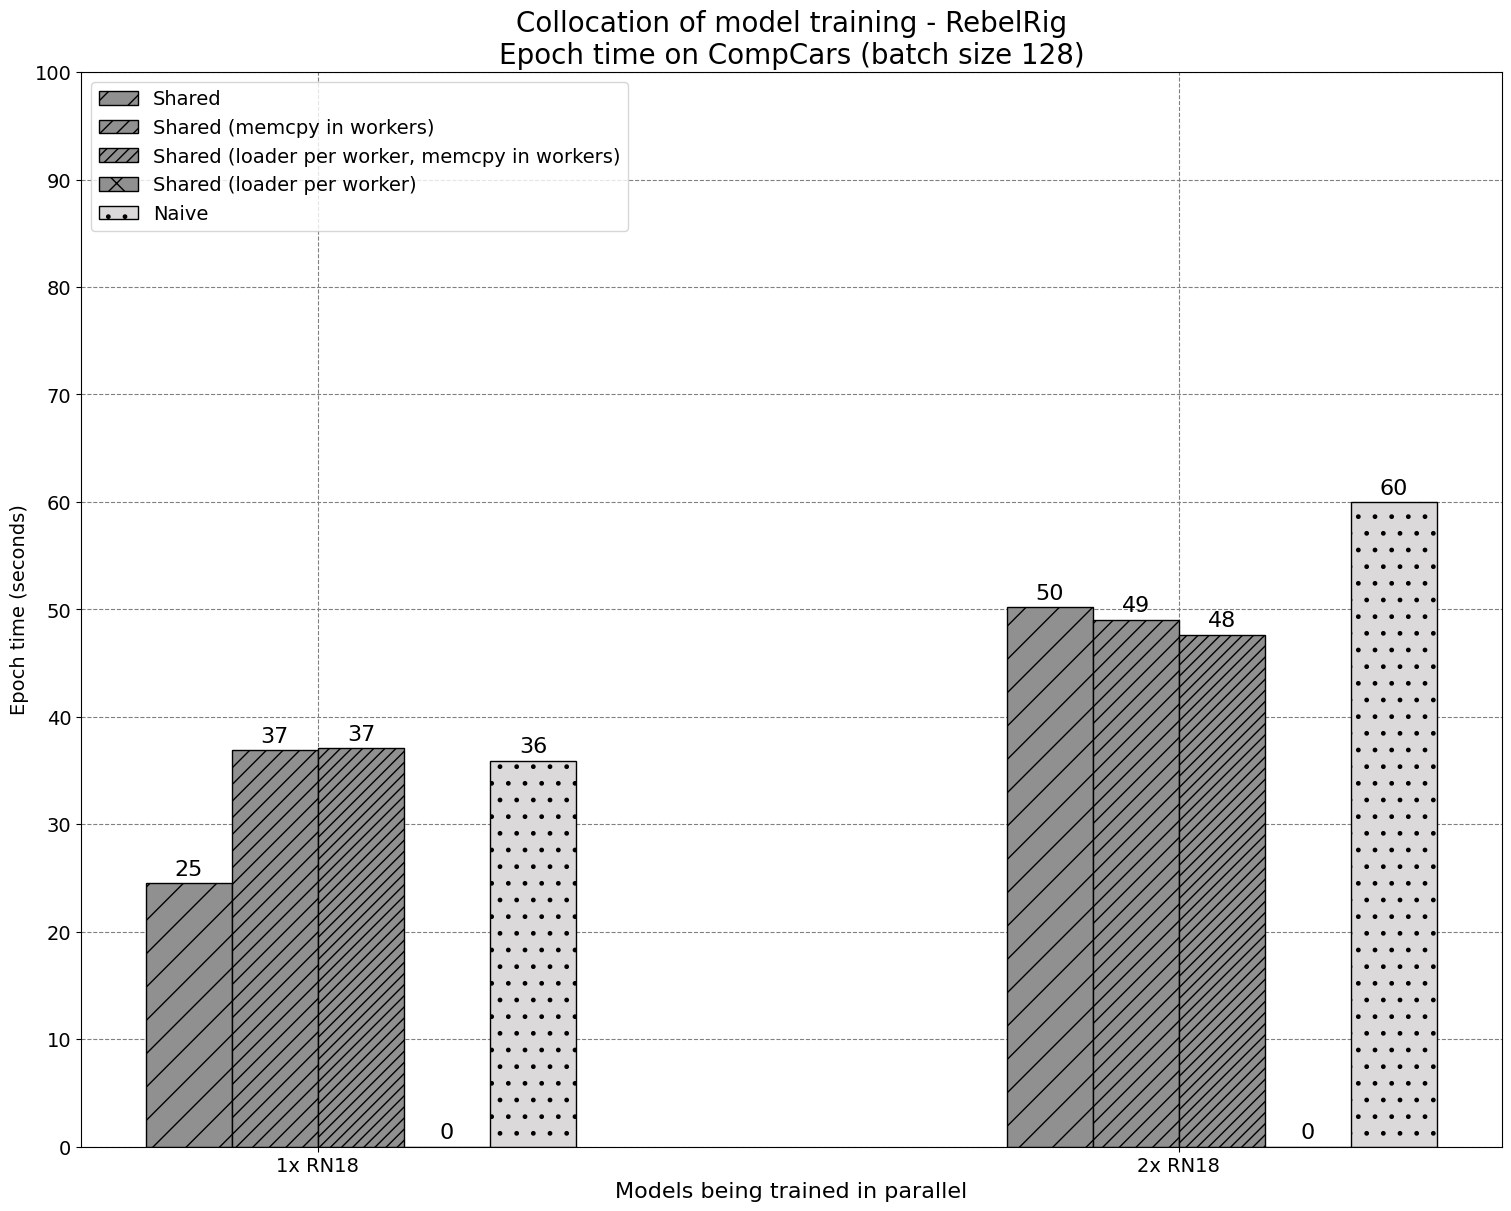

In [6]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18")

naive = [df.iloc[2:-1]["total_time"].mean() for df in [df_1x, df_2x]]

shared = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_1x, df_mul_2x]]

shared_memcpy_workers = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_1x_memcpy_workers, df_mul_2x_memcpy_workers]]

shared_memcpy_loader_workers = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_1x_memcpy_loader_workers, df_mul_2x_memcpy_loader_workers]]

measurements ={
    "Shared": shared,
    "Shared (memcpy in workers)": shared_memcpy_workers,
    "Shared (loader per worker, memcpy in workers)": shared_memcpy_loader_workers,
    "Shared (loader per worker)": [0,0],
    "Naive": naive,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
#shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]
#shades = ["#000000", "#1f1e1e", "#4d4b4b", "#757272", "#9c9797", "#bfbaba"]
hatches = ["/", "//", "///", "x", ".", "..", "....", "x"]
hatch_cols = ["#919090", "#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on CompCars (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 101, 10)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [10]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}_gpu_util.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}_gpu_util.csv")

# SHARED DATA
df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[4]}_gpu_util.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[5]}_gpu_util.csv")

# SHARED + memcpy in workers

df_mul_1x_memcpy_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[16]}_gpu_util.csv")
df_mul_2x_memcpy_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[17]}_gpu_util.csv")

# SHARED + loader per worker, memcpy in workers

df_mul_1x_memcpy_loader_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[18]}_gpu_util.csv")
df_mul_2x_memcpy_loader_workers = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[19]}_gpu_util.csv")


In [11]:
gpu_id = "GPU-0747e121-fccc-f81b-a9eb-53cdbcddaf7e"

dfs_single = [
    df_1x,
    df_2x,
]

dfs_shared = [
    df_mul_1x,
    df_mul_2x,
    df_mul_1x_memcpy_workers,
    df_mul_2x_memcpy_workers,
    df_mul_1x_memcpy_loader_workers,
    df_mul_2x_memcpy_loader_workers
]

lists_single, lists_shared = [], []

for idx, df in enumerate(dfs_single):
    df[df["gpu_uuid"] == gpu_id]
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_single.append(mem)

for idx, df in enumerate(dfs_shared):
    df[df["gpu_uuid"] == gpu_id]
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_shared.append(mem)


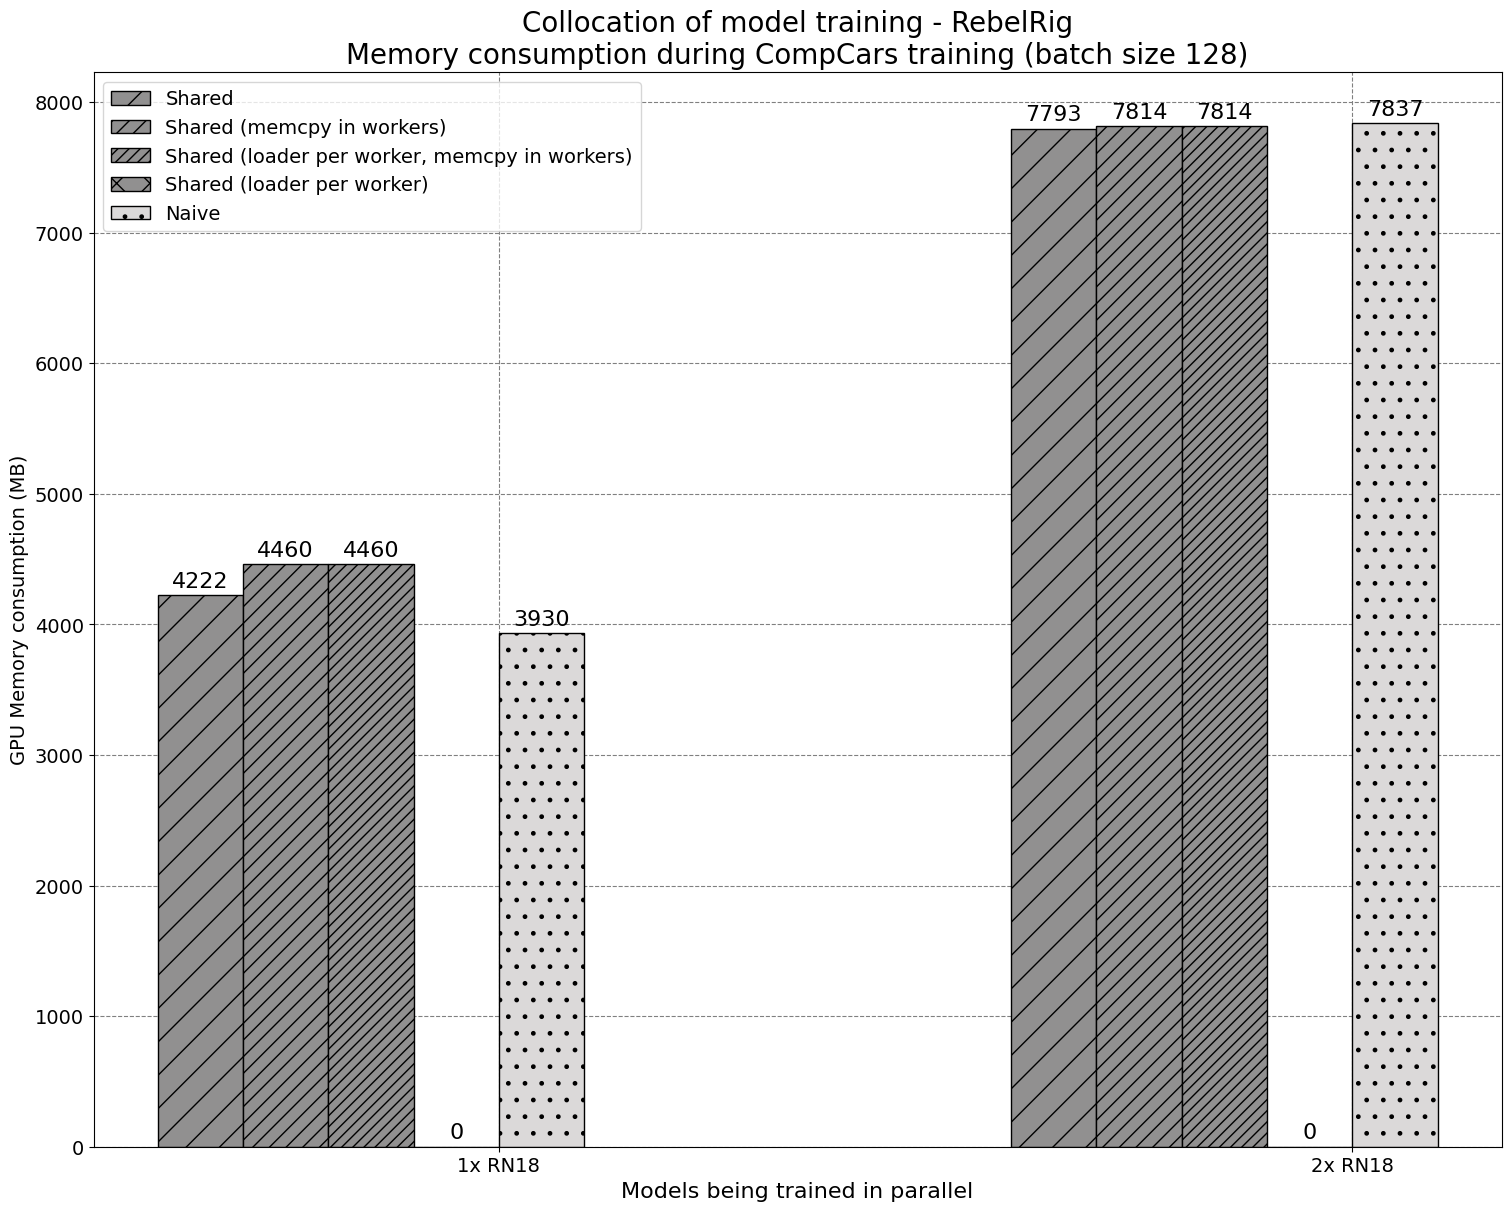

In [12]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18")

naive = lists_single[:2]

shared = lists_shared[:2]

shared_memcpy_workers = lists_shared[2:4]

shared_memcpy_loader_workers = lists_shared[4:6]

measurements ={
    "Shared": shared,
    "Shared (memcpy in workers)": shared_memcpy_workers,
    "Shared (loader per worker, memcpy in workers)": shared_memcpy_loader_workers,
    "Shared (loader per worker)": [0,0],
    "Naive": naive,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -2.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
hatches = ["/", "//", "///", "x", ".", "..", "....", "x"]
hatch_cols = ["#919090", "#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during CompCars training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 8192, 1000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [10]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}_gpu_util.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}_gpu_util.csv")

# BASELINE + MPS

df_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}_gpu_util.csv")
df_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}_gpu_util.csv")

# SHARED DATA

df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[4]}_gpu_util.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[5]}_gpu_util.csv")

# SHARED DATA + MPS

df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[6]}_gpu_util.csv")
df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[7]}_gpu_util.csv")

# BASELINE + DALI

df_dali_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}_gpu_util.csv")
#df_dali_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}_gpu_util.csv")

# SHARED + DALI

df_mul_dali_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[10]}_gpu_util.csv")
df_mul_dali_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[11]}_gpu_util.csv")

# BASELINE + DALI + MPS

#df_dali_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[12]}_gpu_util.csv")
#df_dali_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[13]}_gpu_util.csv")

# SHARED + DALI + MPS

#df_mul_dali_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}_gpu_util.csv")
#df_mul_dali_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}_gpu_util.csv")

In [11]:
dfs_single = [
    df_1x,
    df_2x,
    df_1x_mps,
    df_2x_mps,
    df_dali_1x,
    #df_dali_2x,
    #df_dali_1x_mps,
    #df_dali_2x_mps,
]

dfs_shared = [
    df_mul_1x,
    df_mul_2x,
    df_mul_1x_mps,
    df_mul_2x_mps,
    df_mul_dali_1x,
    df_mul_dali_2x,
    #df_mul_dali_1x_mps,
    #df_mul_dali_2x_mps,
]

lists_single, lists_shared = [], []

for idx, df in enumerate(dfs_single):
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_single.append(mem)

for idx, df in enumerate(dfs_shared):
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_shared.append(mem)


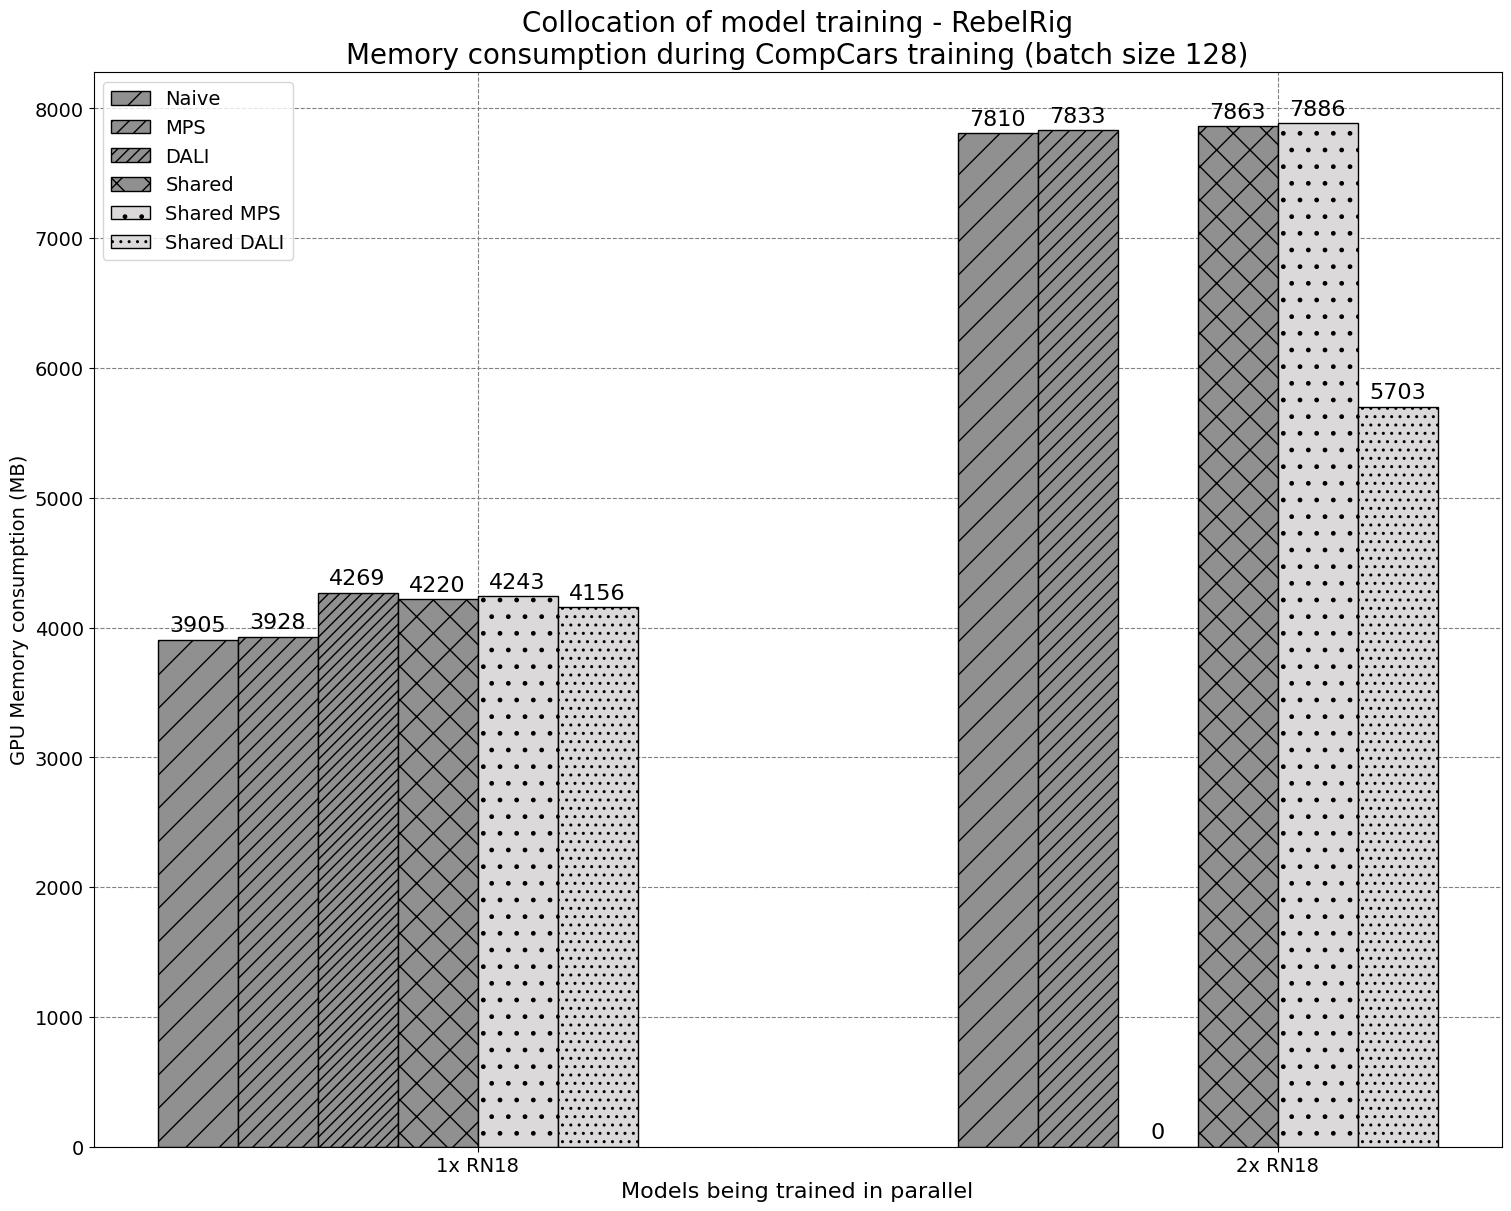

In [12]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18")

naive = lists_single[:2]

mps = lists_single[2:4]

naive_dali = lists_single[4:6] + [0]

#naive_dali_mps = lists_single[6:]

shared = lists_shared[:2]

shared_mps = lists_shared[2:4]

shared_dali = lists_shared[4:6]

#shared_dali_mps = lists_shared[6:]

measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali,
    #"DALI MPS": naive_dali_mps,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
    #"Shared DALI MPS": shared_dali_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -2.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
hatches = ["/", "//", "///", "x", ".", "..", "....", "x"]
hatch_cols = ["#919090", "#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during CompCars training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 8192, 1000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()